In [2]:
#Dependencies
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

In [4]:
#Import Data

data_location = "Data/NCHS_-_Leading_Causes_of_Death__United_States.csv"
data_insurance = "Data/raw_data.csv"

#csv to pandas
data_insurance = pd.read_csv(data_insurance)
data = pd.read_csv(data_location)

In [5]:
# Dataframe with columns we need
data = data[['Year', 'Cause Name', 'State', 'Deaths',
       'Age-adjusted Death Rate']]
data.head()

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2012,Kidney disease,Vermont,21,2.6
1,2016,Kidney disease,Vermont,30,3.7
2,2013,Kidney disease,Vermont,30,3.8
3,2000,Suicide,District of Columbia,23,3.8
4,2014,Kidney disease,Arizona,325,4.1


In [6]:
print(data["State"].unique())
state = input("Pick a state from the list: ")

# Get the data for the specific state
data_state = data.loc[data["Cause Name"] != "All causes"]
data_state = data_state.loc[data_state["State"] == state]
print(data_state.shape)
data_state.head()

data_state_group = data_state.groupby(['Year', 'Cause Name']).sum()
data_state_group = data_state_group.sort_values(['Year'], ascending=[True])
data_state_group = data_state_group.reset_index()
table_state = data_state_group.pivot_table(data_state_group, index=['Year'], columns=['Cause Name'])
table_state

['Vermont' 'District of Columbia' 'Arizona' 'South Dakota' 'Washington'
 'Iowa' 'New York' 'Massachusetts' 'New Jersey' 'California'
 'North Dakota' 'Rhode Island' 'Alaska' 'Oregon' 'Wyoming' 'Idaho'
 'Connecticut' 'Minnesota' 'Illinois' 'Montana' 'New Hampshire' 'Hawaii'
 'Maryland' 'Florida' 'Colorado' 'Nevada' 'Utah' 'Delaware' 'New Mexico'
 'Nebraska' 'Ohio' 'Michigan' 'Maine' 'Tennessee' 'Pennsylvania' 'Texas'
 'Georgia' 'Louisiana' 'Indiana' 'United States' 'Mississippi'
 'South Carolina' 'Virginia' 'Kansas' 'Wisconsin' 'North Carolina'
 'Alabama' 'Kentucky' 'Missouri' 'Oklahoma' 'West Virginia' 'Arkansas']
Pick a state from the list: United States
(180, 5)


Age-adjusted Death Rate                                      \
Cause Name     Alzheimer's disease  CLRD Cancer Diabetes Heart disease   
Year                                                                     
1999                          16.5  45.4  200.8     25.0         266.5   
2000                          18.1  44.2  199.6     25.1         257.6   
2001                          19.3  43.9  196.5     25.4         249.5   
2002                          20.8  43.9  194.3     25.6         244.6   
2003                          22.1  43.7  190.9     25.5         236.3   
2004                          22.6  41.6  186.8     24.8         221.6   
2005                          24.0  43.9  185.1     24.9         216.8   
2006                          23.7  41.0  181.8     23.6         205.5   
2007                          23.8  41.4  179.3     22.8         196.1   
2008                          25.8  44.7  176.4     22.0         192.1   
2009                          24.2  42.7  173.5     21.1         182.8   
2010                          25.1  42.2  172.8     20.8         179.1   
2011                          24.7  42.5  169.0     21.7         173.7   
2012                          23.8  41.5  166.5     21.2         170.5   
2013                          23.5  42.1  163.2     21.2         169.8   
2014                          25.4  40.5  161.2     20.9         167.0   
2015                          29.4  41.6  158.5     21.3         168.5   
2016                          30.3  40.6  155.8     21.0         165.5   

                                                                  \
Cause Name Influenza and pneumonia Kidney disease Stroke Suicide   
Year                                                               
1999                          23.5           13.0   61.6    10.5   
2000                          23.7           13.5   60.9    10.4   
2001                          22.2           14.1   58.4    10.7   
2002                          23.2           14.4   57.2    11.0   
2003                          22.6           14.7   54.6    10.8   
2004                          20.4           14.5   51.2    11.0   
2005                          21.0           14.7   48.0    10.9   
2006                          18.4           14.8   44.8    11.0   
2007                          16.8           14.9   43.5    11.3   
2008                          17.6           15.1   42.1    11.6   
2009                          16.5           15.1   39.6    11.8   
2010                          15.1           15.3   39.1    12.1   
2011                          15.7           13.4   37.9    12.3   
2012                          14.5           13.1   36.9    12.6   
2013                          15.9           13.2   36.2    12.6   
2014                          15.1           13.2   36.5    13.0   
2015                          15.2           13.4   37.6    13.3   
2016                          13.5           13.1   37.3    13.5   

                                               Deaths                  \
Cause Name Unintentional injuries Alzheimer's disease    CLRD  Cancer   
Year                                                                    
1999                         35.3               44536  124181  549838   
2000                         34.9               49558  122009  553091   
2001                         35.7               53852  123013  553768   
2002                         37.1               58866  124816  557271   
2003                         37.6               63457  126382  556902   
2004                         38.1               65965  121987  553888   
2005                         39.5               71599  130933  559312   
2006                         40.2               72432  124583  559888   
2007                         40.4               74632  127924  562875   
2008                         39.3               82435  141090  565469   
2009                         37.5               79003  137353  567628   
2010 

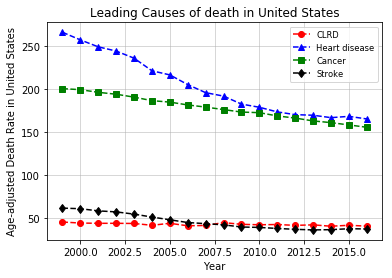

In [8]:
fig, bx = plt.subplots()

bx.errorbar(table_state.index, table_state["Age-adjusted Death Rate"]['CLRD'], fmt="--o", color="r",
            alpha=1, label="CLRD")
bx.errorbar(table_state.index, table_state["Age-adjusted Death Rate"]['Heart disease'], fmt="--^", color="b",
            alpha=1, label="Heart disease")
bx.errorbar(table_state.index, table_state["Age-adjusted Death Rate"]['Cancer'], fmt="--s", color="g",
            alpha=1, label="Cancer")
bx.errorbar(table_state.index, table_state["Age-adjusted Death Rate"]['Stroke'], fmt="--d", color="k",
            alpha=1, label="Stroke")


bx.set_title(f"Leading Causes of death in {state}")
bx.set_xlabel("Year")
bx.set_ylabel(f"Age-adjusted Death Rate in {state}")
bx.grid(linestyle='-', linewidth='0.5')

plt.legend(loc="best", fontsize="small", fancybox=True)

plt.savefig(f'Charts/Leading causes of deaths in {state}')

plt.show()

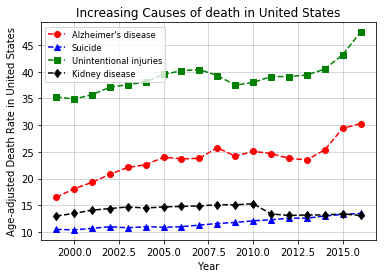

In [9]:
fig, ax = plt.subplots()

ax.errorbar(table_state.index, table_state["Age-adjusted Death Rate"]['Alzheimer\'s disease'], fmt="--o", color="r",
            alpha=1, label="Alzheimer's disease")
ax.errorbar(table_state.index, table_state["Age-adjusted Death Rate"]['Suicide'], fmt="--^", color="b",
            alpha=1, label="Suicide")
ax.errorbar(table_state.index, table_state["Age-adjusted Death Rate"]['Unintentional injuries'], fmt="--s", color="g",
            alpha=1, label="Unintentional injuries")
ax.errorbar(table_state.index, table_state["Age-adjusted Death Rate"]['Kidney disease'], fmt="--d", color="k",
            alpha=1, label="Kidney disease")


ax.set_title(f"Increasing Causes of death in {state}")
ax.set_xlabel("Year")
ax.set_ylabel(f"Age-adjusted Death Rate in {state}")
ax.grid(linestyle='-', linewidth='0.5')

plt.legend(loc="best", fontsize="small", fancybox=True)

plt.savefig(f'Charts/Increasing Causes of deaths  in {state}')

plt.show()

In [10]:
data_insurance.drop('Footnotes', axis=1, inplace = True)
data_insurance.head()

,Location,2008__Employer,2008__Non-Group,2008__Medicaid,2008__Medicare,2008__Other Public,2008__Uninsured,2008__Total,2009__Employer,2009__Non-Group,...,2016__Other Public,2016__Uninsured,2016__Total,2017__Employer,2017__Non-Group,2017__Medicaid,2017__Medicare,2017__Other Public,2017__Uninsured,2017__Total
0,United States,0.535,0.057,0.134,0.109,0.014,0.152,1,0.507,0.054,...,0.015,0.086,1,0.493,0.065,0.206,0.135,0.014,0.088,1
1,Alabama,0.518,0.054,0.143,0.128,0.017,0.140,1,0.488,0.049,...,0.020,0.092,1,0.460,0.062,0.206,0.157,0.020,0.095,1
2,Alaska,0.518,0.036,0.114,0.059,0.066,0.208,1,0.491,0.039,...,0.067,0.145,1,0.452,0.032,0.220,0.089,0.068,0.139,1
3,Arizona,0.464,0.061,0.153,0.118,0.016,0.187,1,0.442,0.056,...,0.016,0.100,1,0.449,0.058,0.223,0.153,0.016,0.100,1
4,Arkansas,0.437,0.054,0.179,0.135,0.016,0.179,1,0.426,0.049,...,0.016,0.080,1,0.415,0.063,0.270,0.155,0.017,0.080,1


In [11]:
# get the type of insurance data you need

col = ['Location']

for year in range(2008,2017):
    a = str(year)+"__Uninsured"
    col.append(a)
next



# Cleaned data for a paricular type of insurance 
df_Uninsured = data_insurance[col]
df_Uninsured.set_index('Location', inplace=True)
df_Uninsured.columns = ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']

state_uninsured = df_Uninsured.loc[state]
state_uninsured
df_state_uninsured = pd.DataFrame(data = {'% Unisured': state_uninsured})
df_state_causes = pd.DataFrame({'Cancer': table_state["Age-adjusted Death Rate"]['Cancer'][9:],
                                         'Heart disease': table_state["Age-adjusted Death Rate"]['Heart disease'][9:]})
df_state_causes = df_state_causes.reset_index()
df_state_uninsured = df_state_uninsured.reset_index()
df_state_causes['% Unisured'] = pd.Series(df_state_uninsured['% Unisured'])
df_state_causes.set_index('Year', inplace=True)
df_state_causes

,Cancer,Heart disease,% Unisured
Year,,,
2008,176.4,192.1,0.152
2009,173.5,182.8,0.152
2010,172.8,179.1,0.156
2011,169.0,173.7,0.152
2012,166.5,170.5,0.148
2013,163.2,169.8,0.146
2014,161.2,167.0,0.117
2015,158.5,168.5,0.094
2016,155.8,165.5,0.086


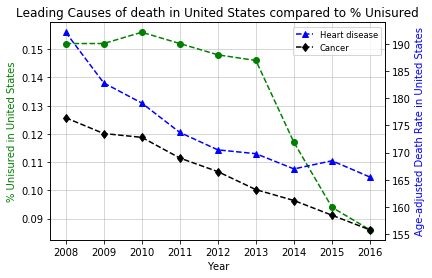

In [12]:
fig, cx1 = plt.subplots()

cx2 = cx1.twinx()
cx1.errorbar(df_state_causes.index, df_state_causes["% Unisured"], fmt="--o", color="g",
            alpha=1, label="% Unisured")
cx2.errorbar(df_state_causes.index, df_state_causes["Heart disease"], fmt="--^", color="b",
            alpha=1, label="Heart disease")
cx2.errorbar(df_state_causes.index, df_state_causes["Cancer"], fmt="--d", color="k",
            alpha=1, label="Cancer")

cx1.set_xlabel('Year')
cx1.set_ylabel(f'% Unisured in {state}', color='g')
cx2.set_ylabel(f"Age-adjusted Death Rate in {state}", color='b')



cx1.set_title(f"Leading Causes of death in {state} compared to % Unisured")
cx1.grid(linestyle='-', linewidth='0.5')

plt.legend(loc="best", fontsize="small", fancybox=True)

# Save fig
plt.savefig(f'Charts/Leading Causes of death in {state} compared to % Unisured')

plt.show()

In [18]:
x = table_state["Age-adjusted Death Rate"].columns
diseases_ = []
change = []
for i in x:
    y = table_state["Age-adjusted Death Rate"][i][2016] - table_state["Age-adjusted Death Rate"][i][2008]
    y = round(y, 2)
    diseases_.append(i)
    change.append(y)

print(diseases_, change)

["Alzheimer's disease", 'CLRD', 'Cancer', 'Diabetes', 'Heart disease', 'Influenza and pneumonia', 'Kidney disease', 'Stroke', 'Suicide', 'Unintentional injuries'] [4.5, -4.1, -20.6, -1.0, -26.6, -4.1, -2.0, -4.8, 1.9, 8.1]


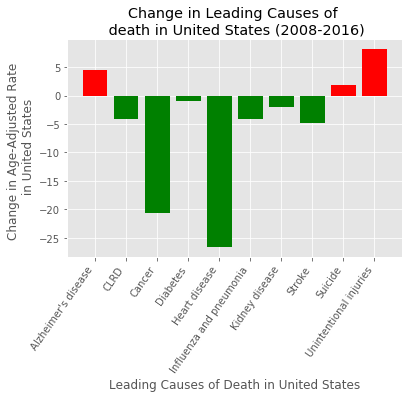

In [36]:
plt.style.use('ggplot')

x_pos = [i for i, _ in enumerate(diseases_)]

plt.bar(x_pos, change, color=['r', 'g', 'g', 'g', 'g', 'g', 'g','g', 'r'])
plt.xlabel(f"Leading Causes of Death in {state}")
plt.ylabel(f'Change in Age-Adjusted Rate \n in {state}')
plt.title(f'Change in Leading Causes of \n death in {state} (2008-2016)')

plt.xticks(x_pos, x, rotation=55, horizontalalignment="right")

plt.savefig(f'Charts/Change in Leading Causes of death in {state}')
plt.show()


In [ ]:
# https://www.kff.org/other/state-indicator/total-population/?activeTab=graph&currentTimeframe=0&startTimeframe=9&selectedRows=%7B%22states%22:%7B%22all%22:%7B%7D%7D,%22wrapups%22:%7B%22united-states%22:%7B%7D%7D%7D&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D